In [1]:
import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_mldata
from sklearn.linear_model import SGDClassifier

import warnings
warnings.filterwarnings('ignore')

## 1. Try to build a classifier for the MNIST dataset that achieves over 97% accuracy on the test set.

In [2]:
mnist = fetch_mldata('MNIST original')
X, y = mnist['data'], mnist['target']

In [3]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = [{'weights': ['uniform', 'distance'], 'n_neighbors': [3, 4, 5]}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3, n_jobs=-1)

In [22]:
grid_search

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'weights': ['uniform', 'distance'], 'n_neighbors': [3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


In [24]:
grid_search.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

## 2. Data augmentation / Training set expansion

In [5]:
from scipy.ndimage.interpolation import shift

In [6]:
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx])
    return shifted_image

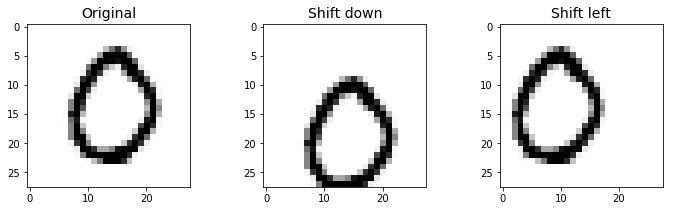

In [7]:
image = X_train[777]
shifted_image_down = shift_image(image, 0, 5)
shifted_image_left = shift_image(image, -5, 0)

plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title('Original', fontsize=14)
plt.imshow(image.reshape(28, 28), cmap='Greys')

plt.subplot(132)
plt.title('Shift down', fontsize=14)
plt.imshow(shifted_image_down.reshape(28, 28), cmap='Greys')

plt.subplot(133)
plt.title('Shift left', fontsize=14)
plt.imshow(shifted_image_left.reshape(28, 28), cmap='Greys')
plt.show()

In [14]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [17]:
shuffle_index = np.random.permutation(60000)
X_train_augmented = X_train_augmented[shuffle_index]
y_train_augmented = y_train_augmented[shuffle_index]

In [25]:
knn_clf = KNeighborsClassifier(**grid_search.best_params_)
knn_clf.fit(X_train_augmented, y_train_augmented)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'